# **Project Name**    -  Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member**     - Zaki Hilal

# **Project Summary -**

The client, an insurance company, seeks assistance in developing a predictive model to determine whether policyholders from the previous year would also be interested in purchasing vehicle insurance offered by the company. Insurance policies provide compensation for specified loss, damage, illness, or death in exchange for regular premium payments. This prediction model is crucial for the company as it enables targeted communication strategies, optimizing business operations, and maximizing revenue.

The insurance industry operates on the principle of risk sharing, where premiums collected from numerous policyholders cover the costs of compensating the few who experience losses. Vehicle insurance, similar to medical insurance, requires customers to pay a premium to the insurance provider. In the event of an unfortunate accident involving the insured vehicle, the insurance company provides compensation, known as the sum assured, to the policyholder.

To develop the predictive model, various factors need to be considered, including demographics (such as gender, age, and region code type), vehicle details (age and damage status), and policy attributes (premium amount and sourcing channel). These factors provide insights into customer behavior and preferences, enabling the company to tailor its marketing and communication strategies effectively.

# **GitHub Link -**

https://github.com/HilalZaki/Health_Insurance_Cross_Sell_Prediction-ML

# **Problem Statement**


The task at hand is to build a predictive model that accurately forecasts whether policyholders from the previous year would express interest in purchasing vehicle insurance from the company. Leveraging demographic information, vehicle details, and policy attributes, the model aims to identify patterns and trends indicative of customer interest in insurance products. By analyzing historical data and employing advanced machine learning algorithms, the objective is to develop a reliable model capable of predicting customer behavior and informing strategic decision-making within the insurance company. The successful implementation of this predictive model will enable the company to optimize its marketing efforts, enhance customer engagement, and ultimately drive business growth and profitability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
import time

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('train_health_insurance.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data[data.duplicated()]

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

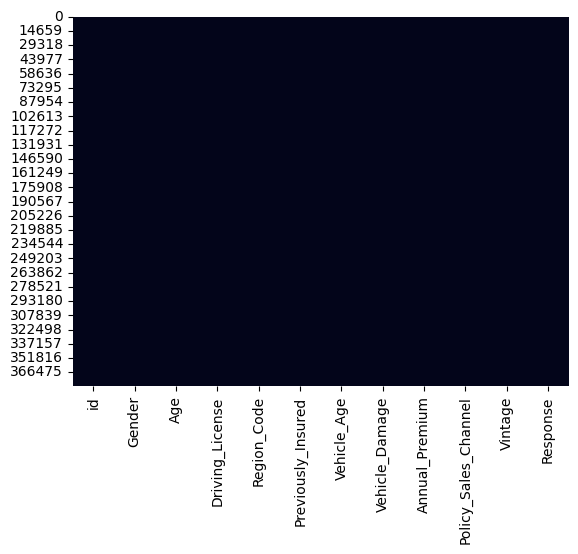

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(),cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Health Insurance industry, and we have to analysis the Response of customers and the insights behind it.

Developing a model to predict if customers are interested in vehicle insurance helps the company communicate better and boost revenue. By looking at things like age, gender along with details about their vehicles and insurance policies, the company can figure out who's likely to want vehicle insurance. This way, they can focus their efforts on reaching out to those potential buyers effectively. Overall, the goal is to improve customer engagement, make business operations smoother, and increase profits in the insurance industry.

The above dataset has 381109 rows and 12 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

### Variables Description

**ID**	- Unique ID for customer

**Gender** - Male/Female

**Age** - Age of customer

**Driving License** - Customer has DL or not

**Region_Code** - Unique code for the region of the customer

**Previously_insured** - Customer already has vehicle insurance or not

**Vehicle_age** - Age of the vehicle

**Vehicle_damage** - Past damages present or not

**Annual_premium** - The amount customer needs to pay as premium

**PolicySalesChannel** - Anonymized Code for the channel of outreaching to the
                         customer ie. Different Agents, Over Mail, Over Phone,
                         In Person, etc

**Vintage** - Number of Days, Customer has been associated with the company

**Response** - Customer is interested or not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is ==",data[i].nunique(),".")

No. of unique values in  id is == 381109 .
No. of unique values in  Gender is == 2 .
No. of unique values in  Age is == 66 .
No. of unique values in  Driving_License is == 2 .
No. of unique values in  Region_Code is == 53 .
No. of unique values in  Previously_Insured is == 2 .
No. of unique values in  Vehicle_Age is == 3 .
No. of unique values in  Vehicle_Damage is == 2 .
No. of unique values in  Annual_Premium is == 48838 .
No. of unique values in  Policy_Sales_Channel is == 155 .
No. of unique values in  Vintage is == 290 .
No. of unique values in  Response is == 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=data.copy()
print("No. of customers Interested : -",len(df[df['Response']==1]))
df_churn=df[(df['Response']==True)]


No. of customers Interested : - 46710


In [ ]:
# Dropping the columns which are not useful for the analysis
df.drop('id',axis=1,inplace=True)

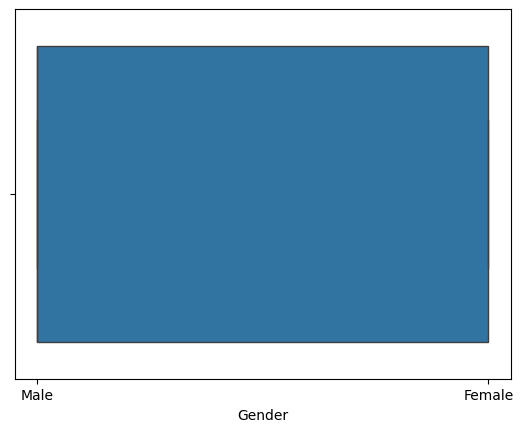

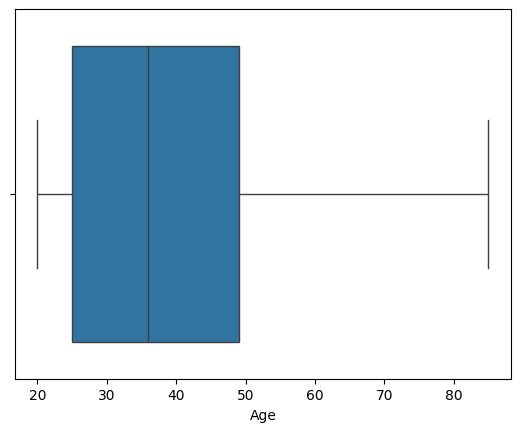

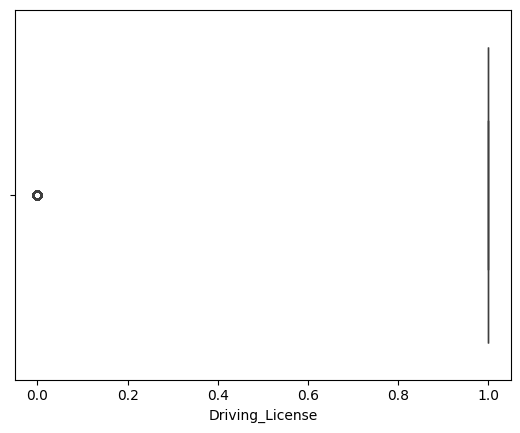

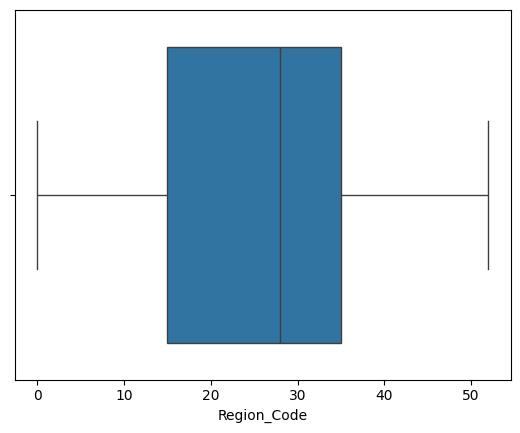

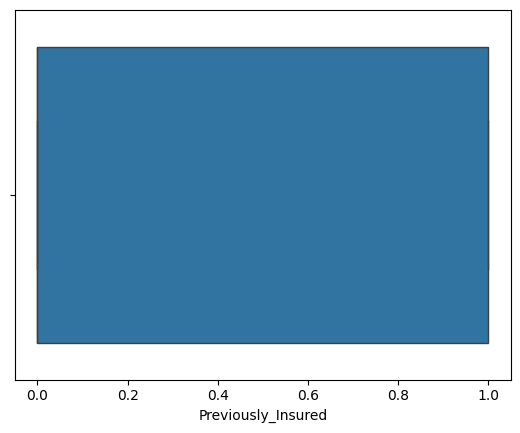

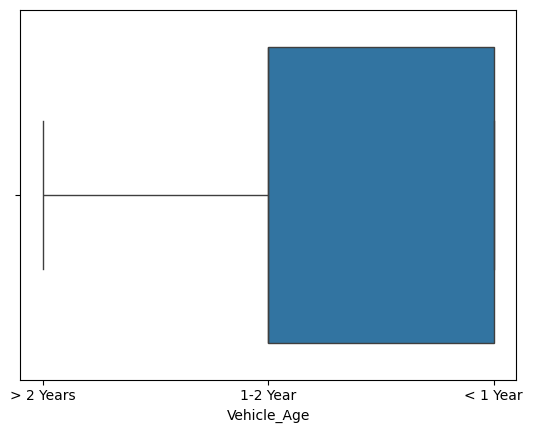

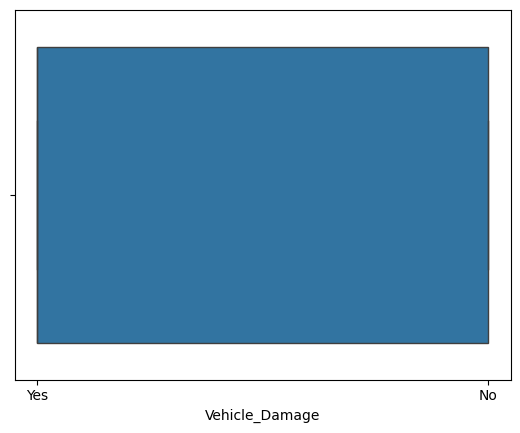

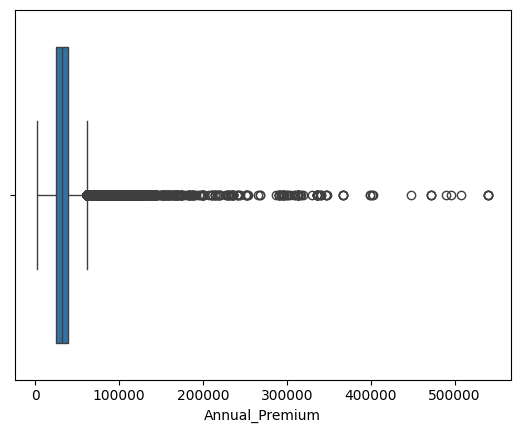

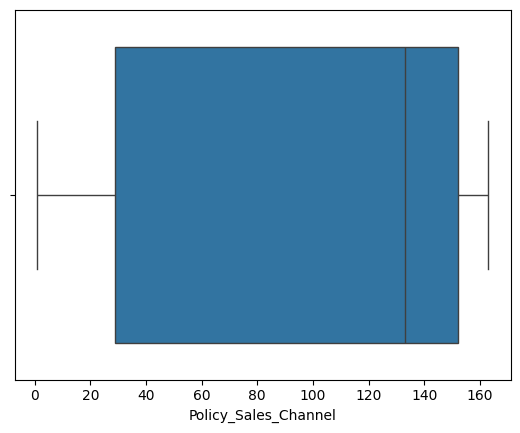

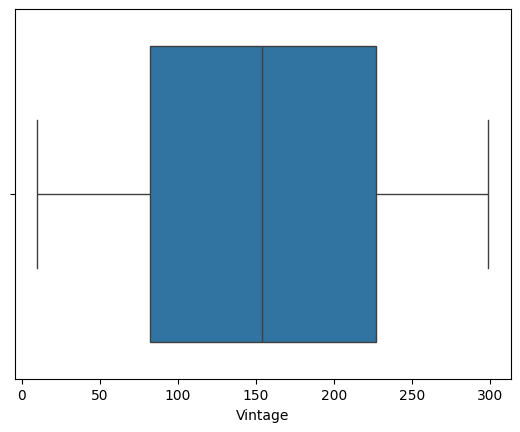

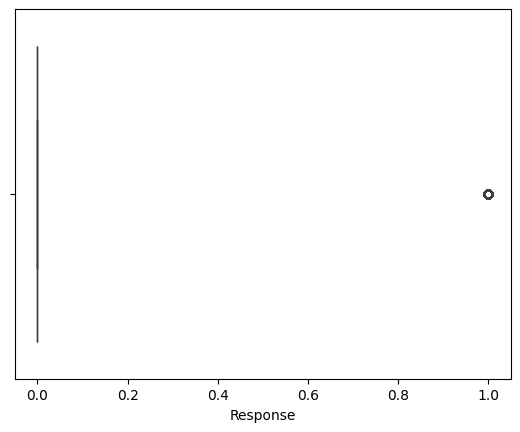

In [ ]:
# Remove outliers from the dataset
# Lets check the outliers using boxplot
for col in df.columns:
  sns.boxplot(data=df,x=col)
  plt.show()

In [ ]:
def IQR(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return lower_bound , upper_bound

lower_bound,upper_bound = IQR('Annual_Premium')

df = df[(df['Annual_Premium'] >= lower_bound) & (df['Annual_Premium'] <= upper_bound)]

In [ ]:
df.shape

(370789, 11)

### What all manipulations have you done and insights you found?

**Handle outliers:** Outliers were identified and managed, especially in numerical column "Annual Premium".Extreme values that could get the analysis wrong, so they are removed.

So I used InterQuartile Range(IQR) to handle outliers

IQR - It is a statistical measure measure that provides a measure of the spread of a dataset. It is defined as difference between third quartile and first quartile.

**IQR = Q3 - Q1**

**Q1** - It is the 25th percentile of the dataset lies below 25% of the data

**Q3** - It is the 75th percentile of the dataset lies below 75% of the data

So I used IQR for **Annual Premium** column

Overall, the data wrangling steps of the Health Insurance Cross Sell Prediction Project ensured that the dataset was clean, consistent, and ready for in-depth exploration and insights. These manipulations changed the dataset for better data analysis and visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Percentage Distribution of Response**

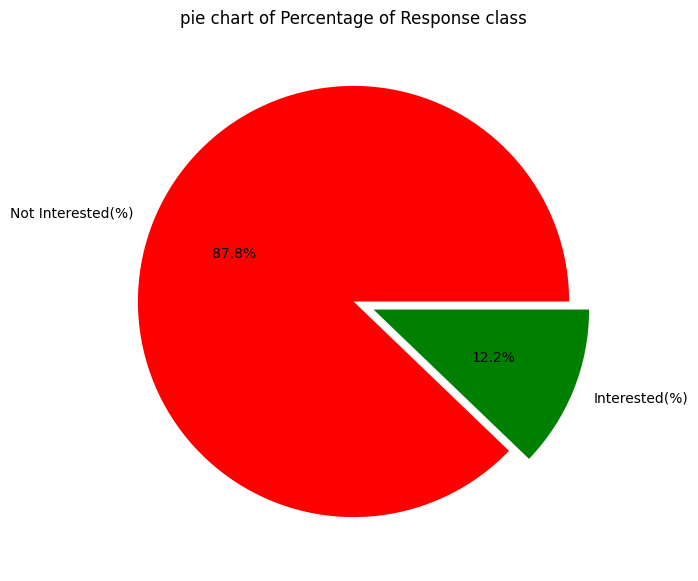

In [ ]:
plt.figure(figsize=(10,6))
count = df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['red','green'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of Response class",labels=['Not Interested(%)','Interested(%)'])
plt.ylabel("")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows that most people, about 87.8%, are not interested in the insurance being offered. Only a smaller portion, around 12.2%, are interested. This means there are far more people saying "no" to the insurance than those saying "yes."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help the business by targeting potential customers better. However, since most people aren't interested in the insurance offer, there might be a problem reaching a larger audience. This could mean the offer needs adjusting to appeal to more people for the business to grow.

#### **Age Distribution Based on Response**

In [ ]:
not_interested_age = df[df['Response']==0]
interested_age = df[df['Response']==1]

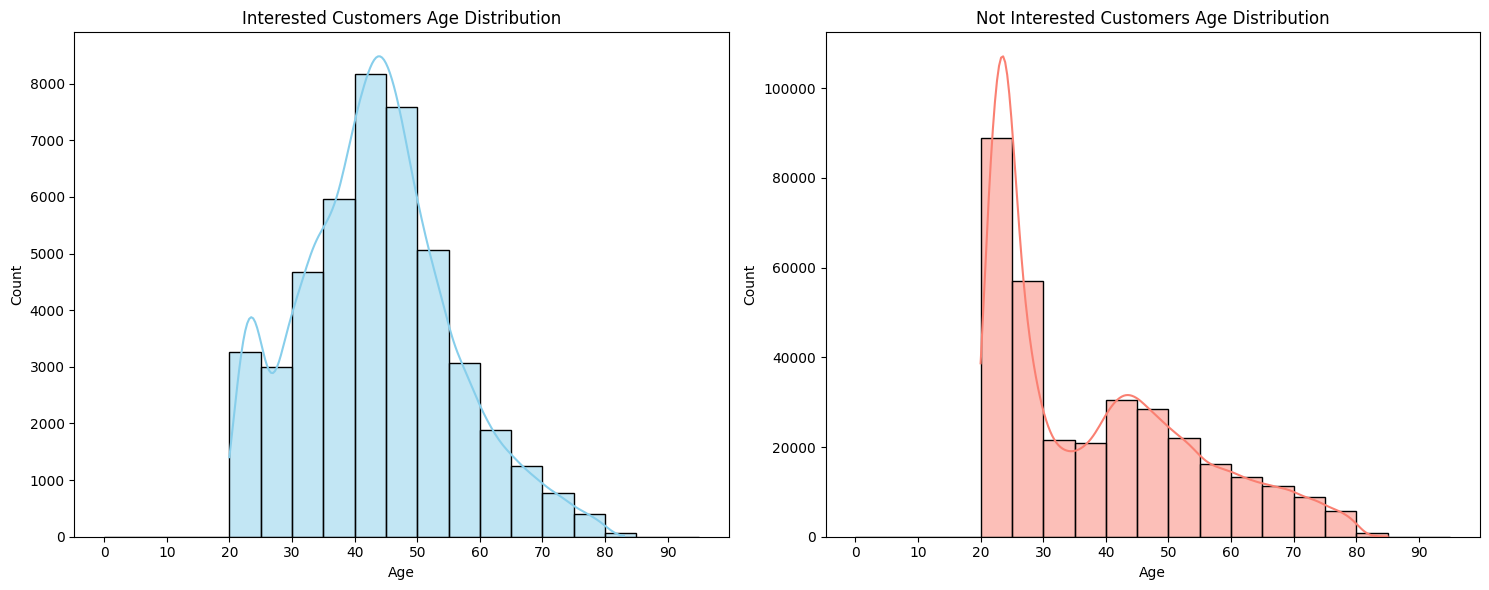

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.histplot(interested_age['Age'], color='skyblue', kde=True, bins=range(0, 100, 5))  # Adjust the bin range as needed
plt.title('Interested Customers Age Distribution')
plt.xticks(range(0, 100, 10))  # Set x-axis ticks as whole numbers
plt.xlabel('Age')  # Label for x-axis

# Plot for not_interested_age
plt.subplot(1, 2, 2)
sns.histplot(not_interested_age['Age'], color='salmon', kde=True, bins=range(0, 100, 5))  # Adjust the bin range as needed
plt.title('Not Interested Customers Age Distribution')
plt.xticks(range(0, 100, 10))  # Set x-axis ticks as whole numbers
plt.xlabel('Age')  # Label for x-axis

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are great for showing the distribution of data across different categories or ranges, like age groups in your case. By using a histogram for age distribution, you can visualize how many individuals fall into each age group, helping to identify any patterns or trends in your data. This can be particularly useful for understanding the demographics of your target audience and tailoring your marketing or product offerings accordingly.

##### 2. What is/are the insight(s) found from the chart?

The histogram for the age distribution of interested customers shows that most of them are between 32 and 55 years old. However, there's a noticeable spike in interest among those aged 40 to 43. This means that people in this age group are showing more interest compared to others, suggesting that targeting marketing efforts towards them might be particularly effective.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the age distribution histogram can indeed create a positive impact on the business. Identifying the peak interest among individuals aged 40 to 43 allows for targeted marketing efforts, potentially increasing conversion rates and revenue. However, focusing solely on this age group might lead to overlooking other age demographics where there could be untapped potential. It's essential to balance targeting efforts to ensure broader market reach and avoid excluding potential customers, which could hinder overall business growth.

#### **Annual Premium Based on Response**

In [ ]:
not_interested_ap = df[df['Response']==0]
interested_ap = df[df['Response']==1]

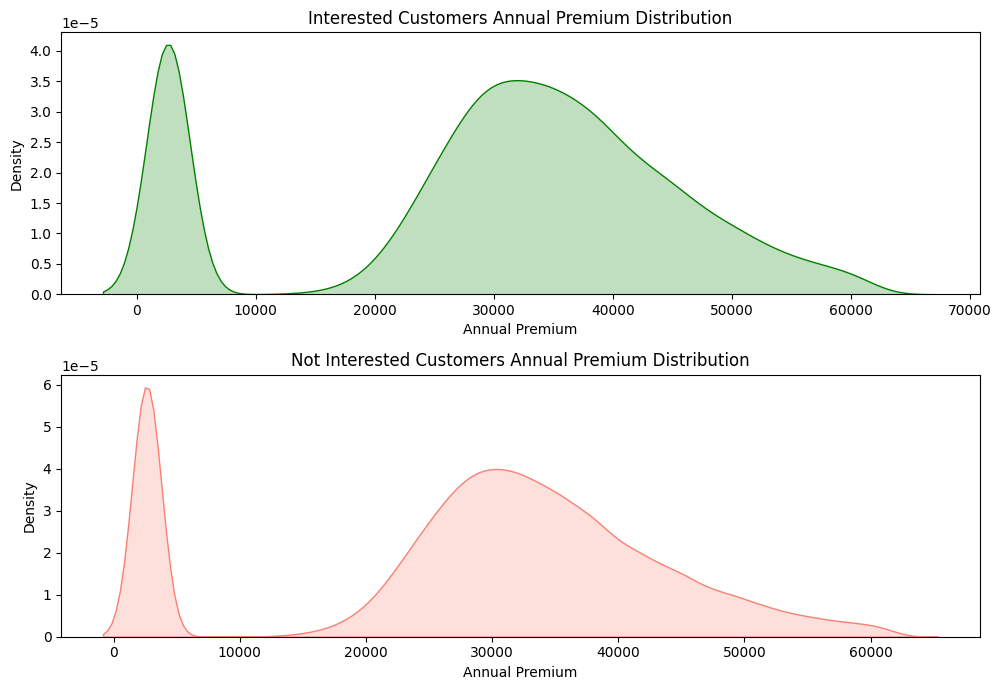

In [ ]:
plt.figure(figsize=(10, 7))

# Plot for interested customers
plt.subplot(2, 1, 1)
sns.kdeplot(data=interested_ap['Annual_Premium'], color='green', shade=True)
plt.title('Interested Customers Annual Premium Distribution')
plt.xlabel('Annual Premium')

# Plot for not interested customers
plt.subplot(2, 1, 2)
sns.kdeplot(data=not_interested_ap['Annual_Premium'], color='salmon', shade=True)
plt.title('Not Interested Customers Annual Premium Distribution')
plt.xlabel('Annual Premium')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

KDE plots, or Kernel Density Estimation plots, visualize the probability density function of a continuous random variable. They're useful for understanding the distribution of data and detecting modes, outliers, and patterns in data distributions.

##### 2. What is/are the insight(s) found from the chart?

The insight gained from the kdeplot is that the distribution of annual premiums is similar for both interested and not interested customers, with a majority falling within the range of 25000 to 43000. This suggests that the annual premium amount alone may not be a significant factor influencing customer interest in the insurance offer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the similarity in premium distribution might indicate stability or consistency in pricing strategy across customer segments, it may also imply missed opportunities for tailoring premium options to better attract interested customers. Thus, while the insights provide a baseline understanding of premium distribution, they may not directly lead to a positive business impact without further analysis or adjustments in pricing strategies. The lack of differentiation in premium distribution between interested and not interested customers could potentially limit growth if the business fails to identify and capitalize on factors beyond premium amounts that influence customer interest in insurance products.

#### **Gender Count Based on Response**

In [ ]:
gender_interest = df[df['Response']==1]
gender_not_interest = df[df['Response']==0]

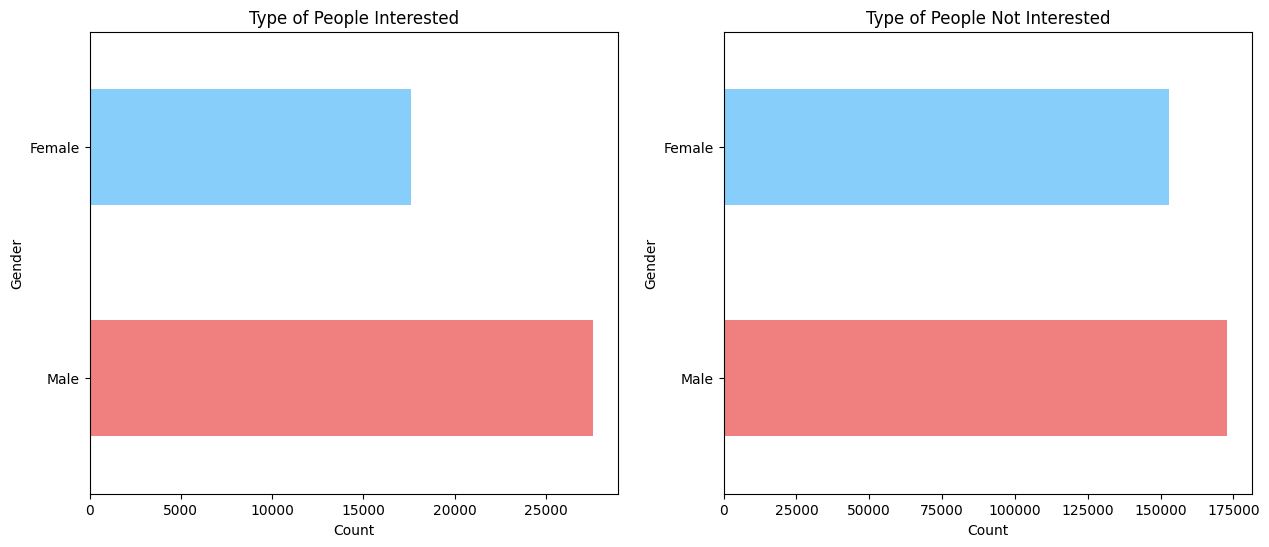

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
gender_counts = gender_interest['Gender'].value_counts()
gender_counts.plot(kind='barh', color=['lightcoral', 'lightskyblue'])
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Type of People Interested')

plt.subplot(1,2,2)
gender_counts = gender_not_interest['Gender'].value_counts()
gender_counts.plot(kind='barh', color=['lightcoral', 'lightskyblue'])
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Type of People Not Interested')

plt.show()

##### 1. Why did you pick the specific chart?

I chose the bar graph to display the count of genders for interested and not interested customers because it provides a clear and easy-to-understand visual representation of categorical data. Bar graphs allow for a straightforward comparison of the number of males and females in each group, making it easy to identify any disparities in gender distribution between interested and not interested customers.

##### 2. What is/are the insight(s) found from the chart?

The insight gained from the bar graph is that there is a noticeable difference in gender distribution between interested and not interested customers. Specifically, there are more males interested in the insurance offer compared to females, while among not interested customers, there are more females than males. This suggests a potential gender-based trend in customer interest in the insurance product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could positively impact the business by guiding targeted marketing efforts towards the gender more interested in the insurance. However, if the business overlooks the gender difference and fails to address it, there might be missed opportunities for growth, leading to negative impacts on overall performance.

#### **Distribution of Age By Gender & Response**

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
fig = px.histogram(df, x='Age', color='Response', facet_col='Gender', title='Distribution of Age by Gender and Response')
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Frequency')
fig.show()

<Figure size 1200x600 with 0 Axes>

##### 1. Why did you pick the specific chart?

A histogram is used to visualize the distribution of a continuous variable, such as age, by displaying the frequency of data points within predefined bins. It's effective for identifying patterns, outliers, and overall distribution characteristics within the data. Additionally, it allows for comparisons between different groups or categories, as demonstrated by facetting by gender and coloring by response in the provided example.

##### 2. What is/are the insight(s) found from the chart?

Age distribution: The chart reveals that the age group with the most respondents is between 30 and 40 years old, followed by the 20-30 age group. It also shows fewer respondents in other age groups.

Gender distribution: The histogram indicates that there are more male respondents than female respondents across all age groups.
Response distribution: The most common response comes from people in the 30-40 age group, while the least common response is from people in the 70-80 age group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding who is interested in vehicle insurance can help businesses make better decisions. But we need to be careful not to rely too much on things like age and gender. People are different, and just because someone is a certain age or gender doesn't mean they all think the same. We should look at other things too, not just age and gender, to make sure we're being fair and making good decisions.

#### **Percentage Distribution of Driving license**

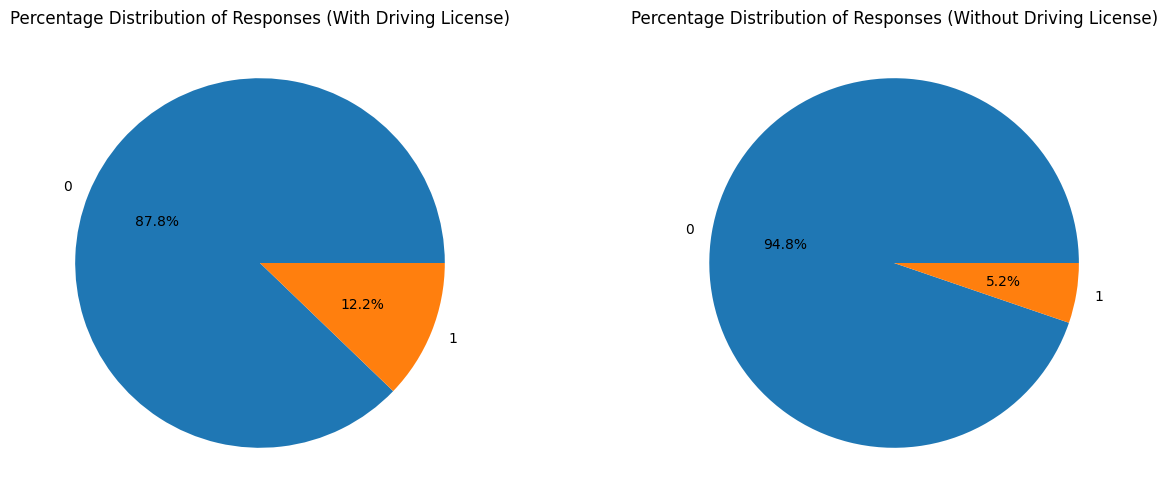

In [ ]:
dl_available = df[df['Driving_License'] == 1]
dl_not_available = df[df['Driving_License'] == 0]

with_license_percentage = dl_available['Response'].value_counts(normalize=True) * 100
without_license_percentage = dl_not_available['Response'].value_counts(normalize=True) * 100

plt.figure(figsize=(15, 6))
plt.subplot(1, 2,1)

# Plot for customers with a driving license
plt.pie(with_license_percentage, labels=with_license_percentage.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Responses (With Driving License)')

plt.subplot(1,2,2)
# Plot for customers without a driving license
plt.pie(without_license_percentage, labels=without_license_percentage.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Responses (Without Driving License)')

plt.show()

##### 1. Why did you pick the specific chart?

I chose to create pie charts because they effectively illustrate the distribution of categorical data, making it easy to compare percentages across different categories. In the context of predicting customer interest in vehicle insurance for a health insurance cross-sell project, pie charts provide a clear visualization of the proportion of customers with and without a driving license who are willing to purchase vehicle insurance.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the pie charts indicate a significant difference in interest levels between customers with and without a driving license. For customers with a driving license, approximately 12.2% are interested in purchasing vehicle insurance, while 87.8% are not interested. Conversely, for customers without a driving license, only 5.2% express interest, with 94.8% showing no interest. This suggests that possessing a driving license may influence the likelihood of customers being interested in vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the gained insights can help businesses target their marketing strategies more effectively and potentially increase sales. However, there is a risk of overlooking potential customers if businesses solely focus on those with driving licenses. It's essential to consider diversification in the customer base to ensure sustainable growth.

#### **Annual Premium by Previously Insured and Response**

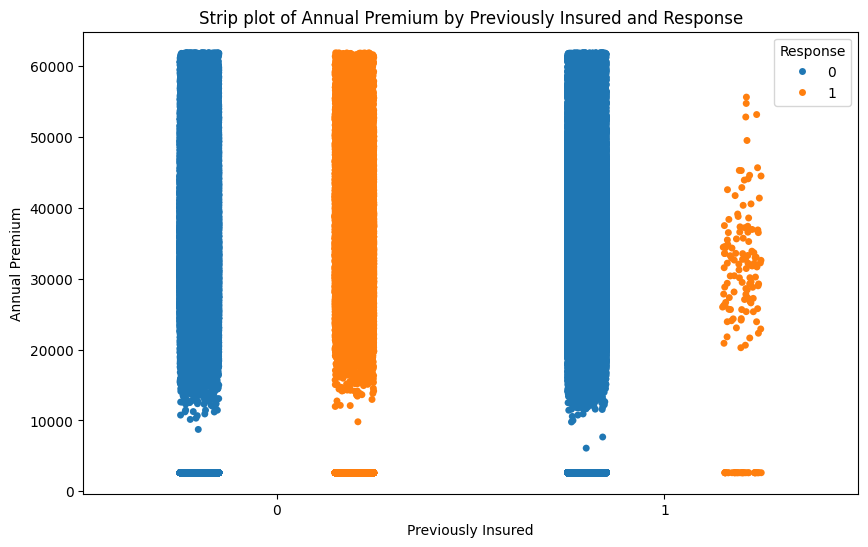

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Previously_Insured', y='Annual_Premium', hue='Response', jitter=True, dodge=True)
plt.title('Strip plot of Annual Premium by Previously Insured and Response')
plt.xlabel('Previously Insured')
plt.ylabel('Annual Premium')
plt.legend(title='Response')
plt.show()

##### 1. Why did you pick the specific chart?


I chose to create a strip plot because it effectively visualizes the distribution of a continuous variable across different categories while also showing the response as a hue. This allows for easy comparison of values between the categories and provides insights into the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

The insights from the strip plot suggest that customers who are not previously insured are more likely to be interested in the insurance product compared to those who are previously insured. Additionally, there are customers in both categories (previously insured and not previously insured) who are not interested. Furthermore, customers with an annual premium exceeding 20,000 are more likely to be interested in the insurance product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights obtained from the strip plot can help businesses tailor their marketing strategies and product offerings more effectively. By understanding that customers who are not previously insured and those with higher annual premiums are more likely to be interested, businesses can target these segments with personalized marketing campaigns and offers, potentially increasing sales.

#### **Age vs Annual Premium vs Vehicle Age vs Previously Insured Based on Response**

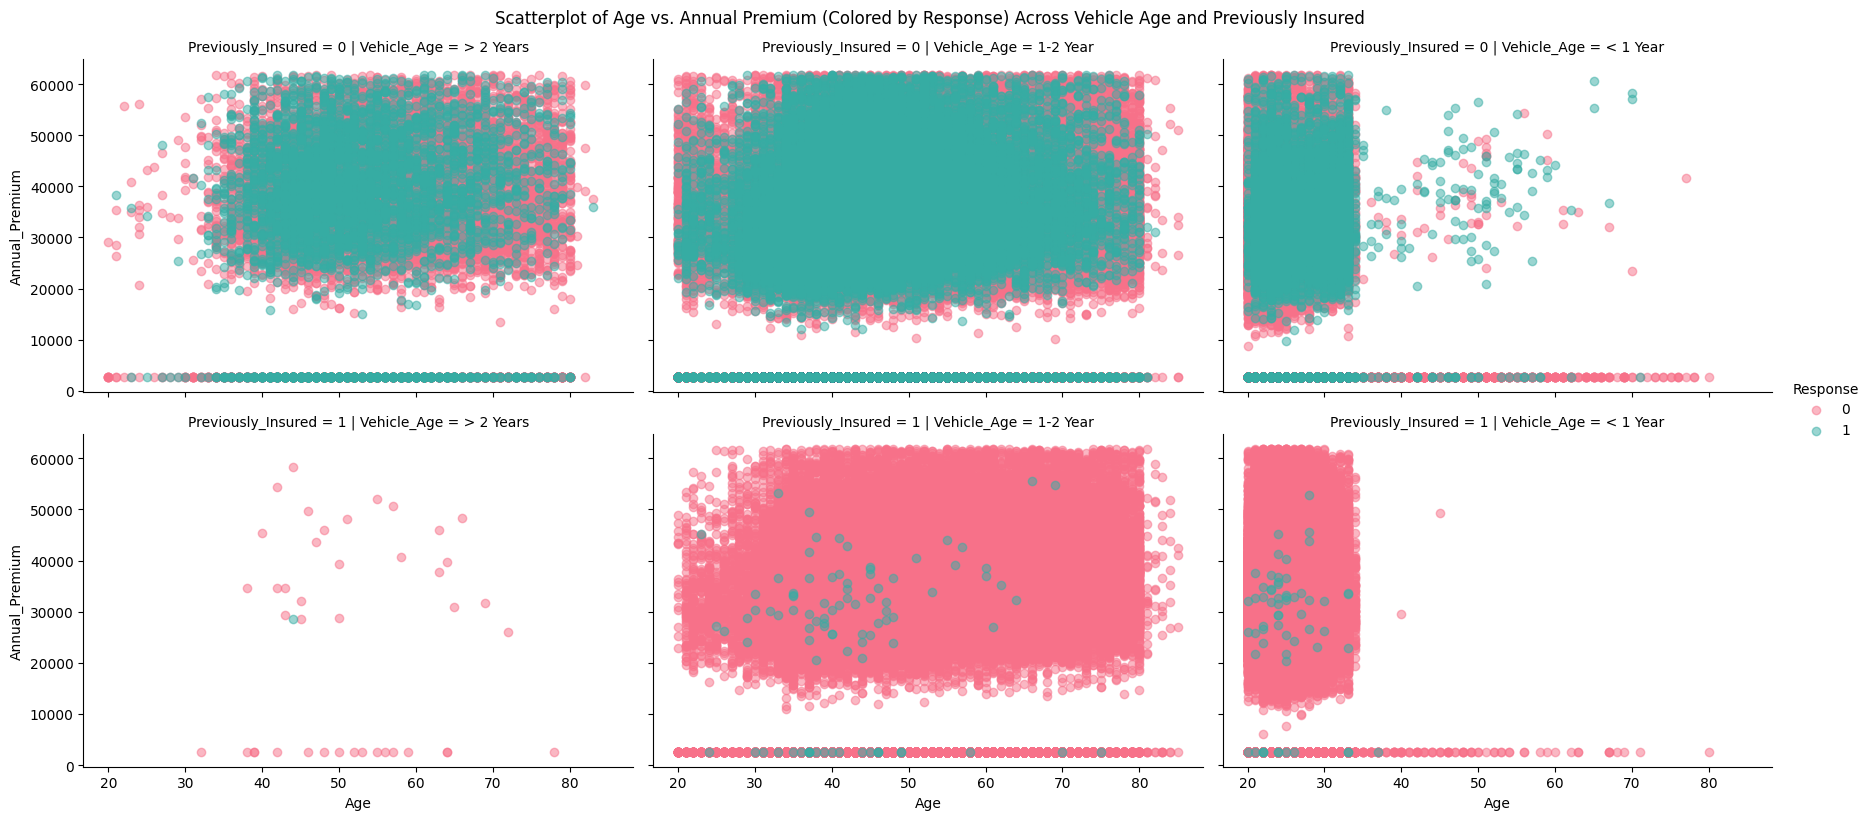

In [ ]:
# Chart - 8 visualization code
g = sns.FacetGrid(df, col='Vehicle_Age', row='Previously_Insured', hue='Response', palette='husl', height=4, aspect=1.5)
g.map(plt.scatter, 'Age', 'Annual_Premium', alpha=0.5)
g.add_legend()
plt.suptitle('Scatterplot of Age vs. Annual Premium (Colored by Response) Across Vehicle Age and Previously Insured', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?


I chose to create a scatterplot using FacetGrid because it allows for the visualization of the relationship between two continuous variables across different subsets of categorical variables. This type of chart is effective for identifying patterns and trends in the data, particularly how certain variables relate to each other across different segments of the dataset.






##### 2. What is/are the insight(s) found from the chart?

The insights from the scatterplot analysis are as follows:

Customers who are not previously insured show a higher interest in insurance across all vehicle age categories.

Conversely, customers who are previously insured exhibit little to no interest in insurance, regardless of their age or vehicle age.

The scatterplot also illustrates the distribution of age and annual premium values within each subset, allowing for a comprehensive understanding of how these variables vary across different customer segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the scatterplot can be valuable for businesses. By understanding the relationship between age, annual premium, and customer interest in insurance across different customer segments, businesses can tailor their marketing strategies and product offerings to target the most receptive audience effectively.

#### **Annual Premium vs Gender vs Response**

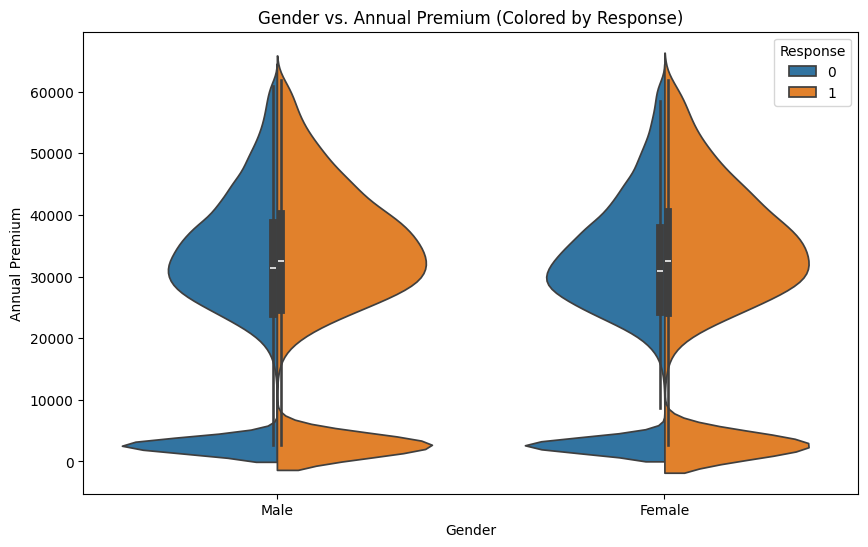

In [ ]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Annual_Premium', hue='Response', data=df, split=True)
plt.title('Gender vs. Annual Premium (Colored by Response)')
plt.xlabel('Gender')
plt.ylabel('Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

The violin plot was chosen for its ability to effectively visualize the distribution of a continuous variable across different categories without specifying the variable names. This type of chart provides insights into the variation in annual premiums between genders and their relationship with customer interest, offering a comprehensive view of the data distribution.

##### 2. What is/are the insight(s) found from the chart?

The insights from the violin plot suggest that the distribution of annual premiums is similar for both males and females. The size and position of the violin shapes are comparable, and the median values are roughly at the same level for both genders. However, there is more variability in annual premiums for females than for males, as indicated by the wider spread of the violin plot for females. Additionally, most customers, regardless of gender, who are interested or not interested in the product fall within the annual premium range of 20,000 to 45,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the violin plot can be helpful for businesses. By understanding how annual premiums vary between genders and their relationship with customer interest, businesses can adjust their strategies to better target their audience. However, it's important to note that overlooking the variability in annual premiums, particularly for females, may result in missed opportunities. Therefore, considering these insights can aid businesses in making informed decisions and potentially increasing their effectiveness in reaching customers.

#### **Annual Premium vs Vehicle Damage vs Response vs Previously Insured**

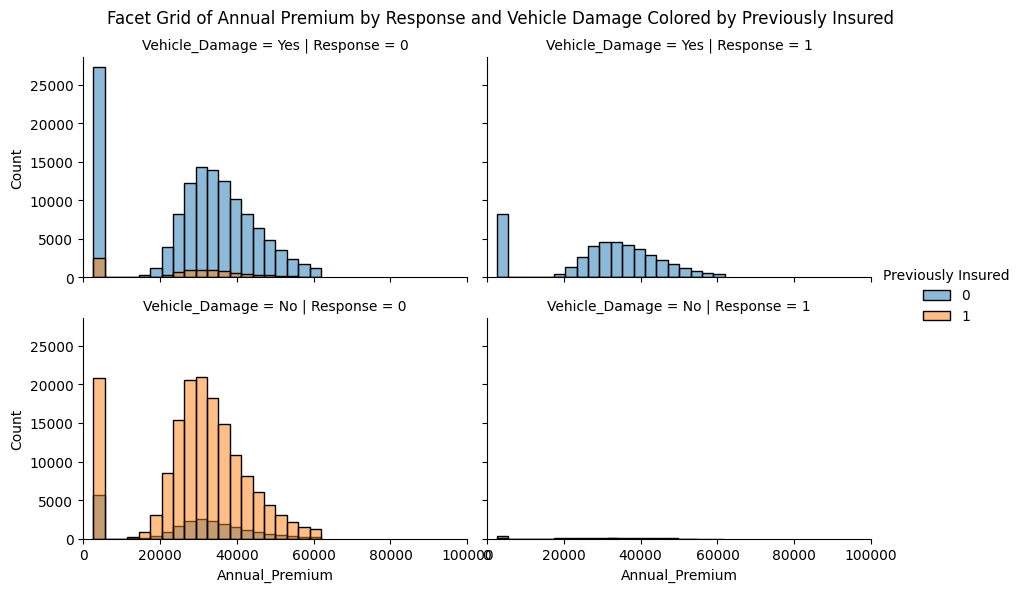

In [ ]:
# Chart - 11 visualization code
g = sns.FacetGrid(df, col='Response', row='Vehicle_Damage', hue='Previously_Insured', height=3,aspect=1.5)
g.map(sns.histplot, 'Annual_Premium', bins=20, alpha=0.5)
g.add_legend(title='Previously Insured')
g.set(xlim=(0, 100000))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid of Annual Premium by Response and Vehicle Damage Colored by Previously Insured')
plt.show()

##### 1. Why did you pick the specific chart?

I chose to create a FacetGrid because it allows for the visualization of multiple subsets of data in separate panels within a single plot. This type of chart is suitable for comparing the distribution of a continuous variable across different combinations of categorical variables, providing insights into their relationships.

##### 2. What is/are the insight(s) found from the chart?

In the graph where Vehicle Damage is "yes" and Response is "0" (not interested in insurance), the majority of customers who are not previously insured have annual premiums ranging from 20,000 to 60,000.

In the graph where Vehicle Damage is "yes" and Response is "1" (interested in insurance), there are no previously insured customers, and only a few customers show interest in insurance.

In the graph where Vehicle Damage is "no" and Response is "0", most customers are previously insured, with very few not previously insured. The majority of customers have annual premiums ranging from 25,000 to 55,000.

In the graph where Vehicle Damage is "no" and Response is "1", there are only a few customers who are not previously insured, and no customers are previously insured.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the analysis can help businesses understand how different factors relate to customer interest in insurance. By examining subsets of data based on vehicle damage, response (interest in insurance), and previous insurance status, businesses can identify patterns and tailor their strategies accordingly. However, overlooking certain customer segments or failing to address the needs of previously insured customers may hinder growth. It's important to consider all insights comprehensively to ensure positive business impact and sustained growth.

####  **Age vs Vehicle Age**

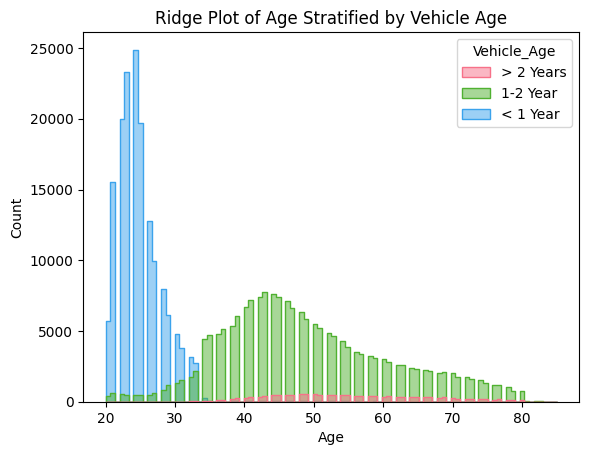

In [ ]:
sns.histplot(df, x='Age', hue='Vehicle_Age', multiple='layer', palette='husl', element='step', fill=True, alpha=0.5)
plt.title('Ridge Plot of Age Stratified by Vehicle Age')
plt.show()

##### 1. Why did you pick the specific chart?

I chose to create a ridge plot because it effectively visualizes the distribution of a continuous variable stratified by a categorical variable. This type of chart allows for easy comparison of distributions across different categories, providing insights into their relationships.

##### 2. What is/are the insight(s) found from the chart?

For vehicles aged less than 1 year, the majority of customers fall within the age group of 20 to 30.

For vehicles aged 1-2 years, the age distribution shifts towards an older demographic, with most customers falling within the age range of 35 to 55.

For vehicles aged more than 2 years, the age group skews even older, with the majority of customers being above the age of 45.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the analysis can be helpful for businesses. By understanding how age distribution varies across different vehicle age categories, businesses can adjust their strategies to better target their audience. However, overlooking certain age demographics or failing to adapt to changing distributions may lead to missed opportunities for growth. It's important for businesses to consider these insights to ensure they effectively reach their target market and sustain growth.

#### **Vehicle Damage vs Response**

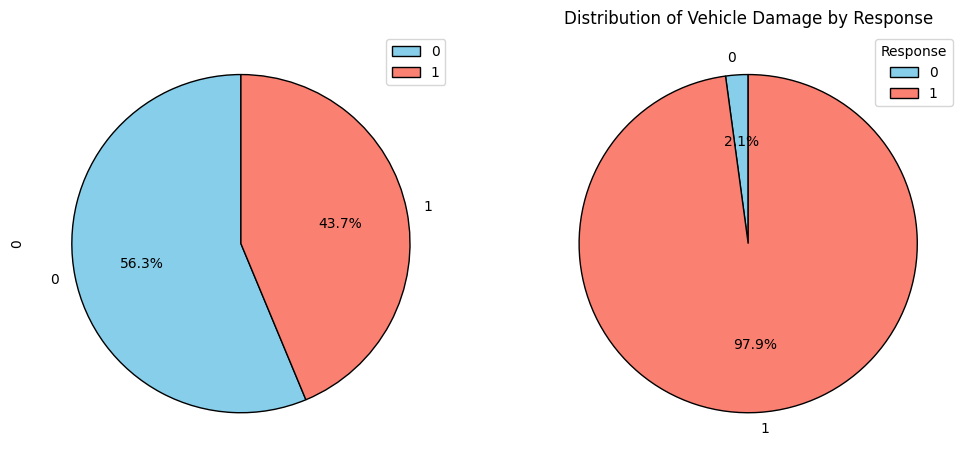

In [ ]:
# Creating a pivot table to count occurrences of each combination
pivot_table = df.groupby(['Vehicle_Damage', 'Response']).size().unstack(fill_value=0)
pivot_table.index = ['0', '1']

# Plotting the pie chart using the modified pivot table
pivot_table.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], wedgeprops={'edgecolor': 'black'}, subplots=True,figsize=(12,6))
plt.title('Distribution of Vehicle Damage by Response')
plt.ylabel('')
plt.legend(title='Response', loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

I chose to create pie charts because they effectively visualize the distribution of categorical data, in this case, the distribution of responses (interested or not interested in insurance) among customers with and without vehicle damage. Pie charts provide a clear representation of proportions, making it easy to compare the distribution of responses in each category.

##### 2. What is/are the insight(s) found from the chart?

For customers with vehicle damage, 56.3% are not interested in insurance, while 43.7% are interested.

For customers without vehicle damage, only 2.1% are not interested in insurance, while a significant majority of 97.9% are interested.

Customers without vehicle damage may have invested more in their vehicles and want to protect their investment, thus showing a higher interest in insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie charts can help businesses tailor their marketing strategies and product offerings more effectively. By understanding the distribution of responses among customers with and without vehicle damage, businesses can target their marketing efforts towards the most receptive audience, potentially increasing sales and customer satisfaction.

#### **Correlation Heatmap**

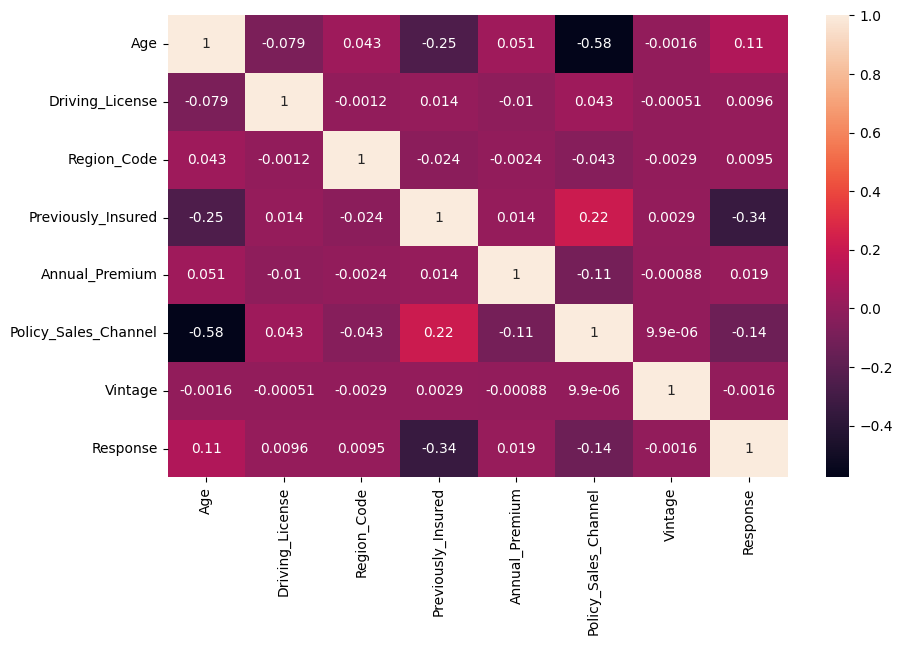

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose to create a heatmap because it provides a visual representation of the correlation between different variables in the dataset. Heatmaps are particularly useful for identifying patterns and relationships in large datasets containing numerical values.

##### 2. What is/are the insight(s) found from the chart?

The insights from the heatmap analysis are as follows:

The highest positive correlation (0.22) is observed between policy sales channel and previously insured.

There is a moderate positive correlation (0.11) between age and response.

The least correlation (-0.58) is observed between policy sales channel and age.

There is a negative correlation (-0.34) between response and previously insured.

####  **Pair Plot**

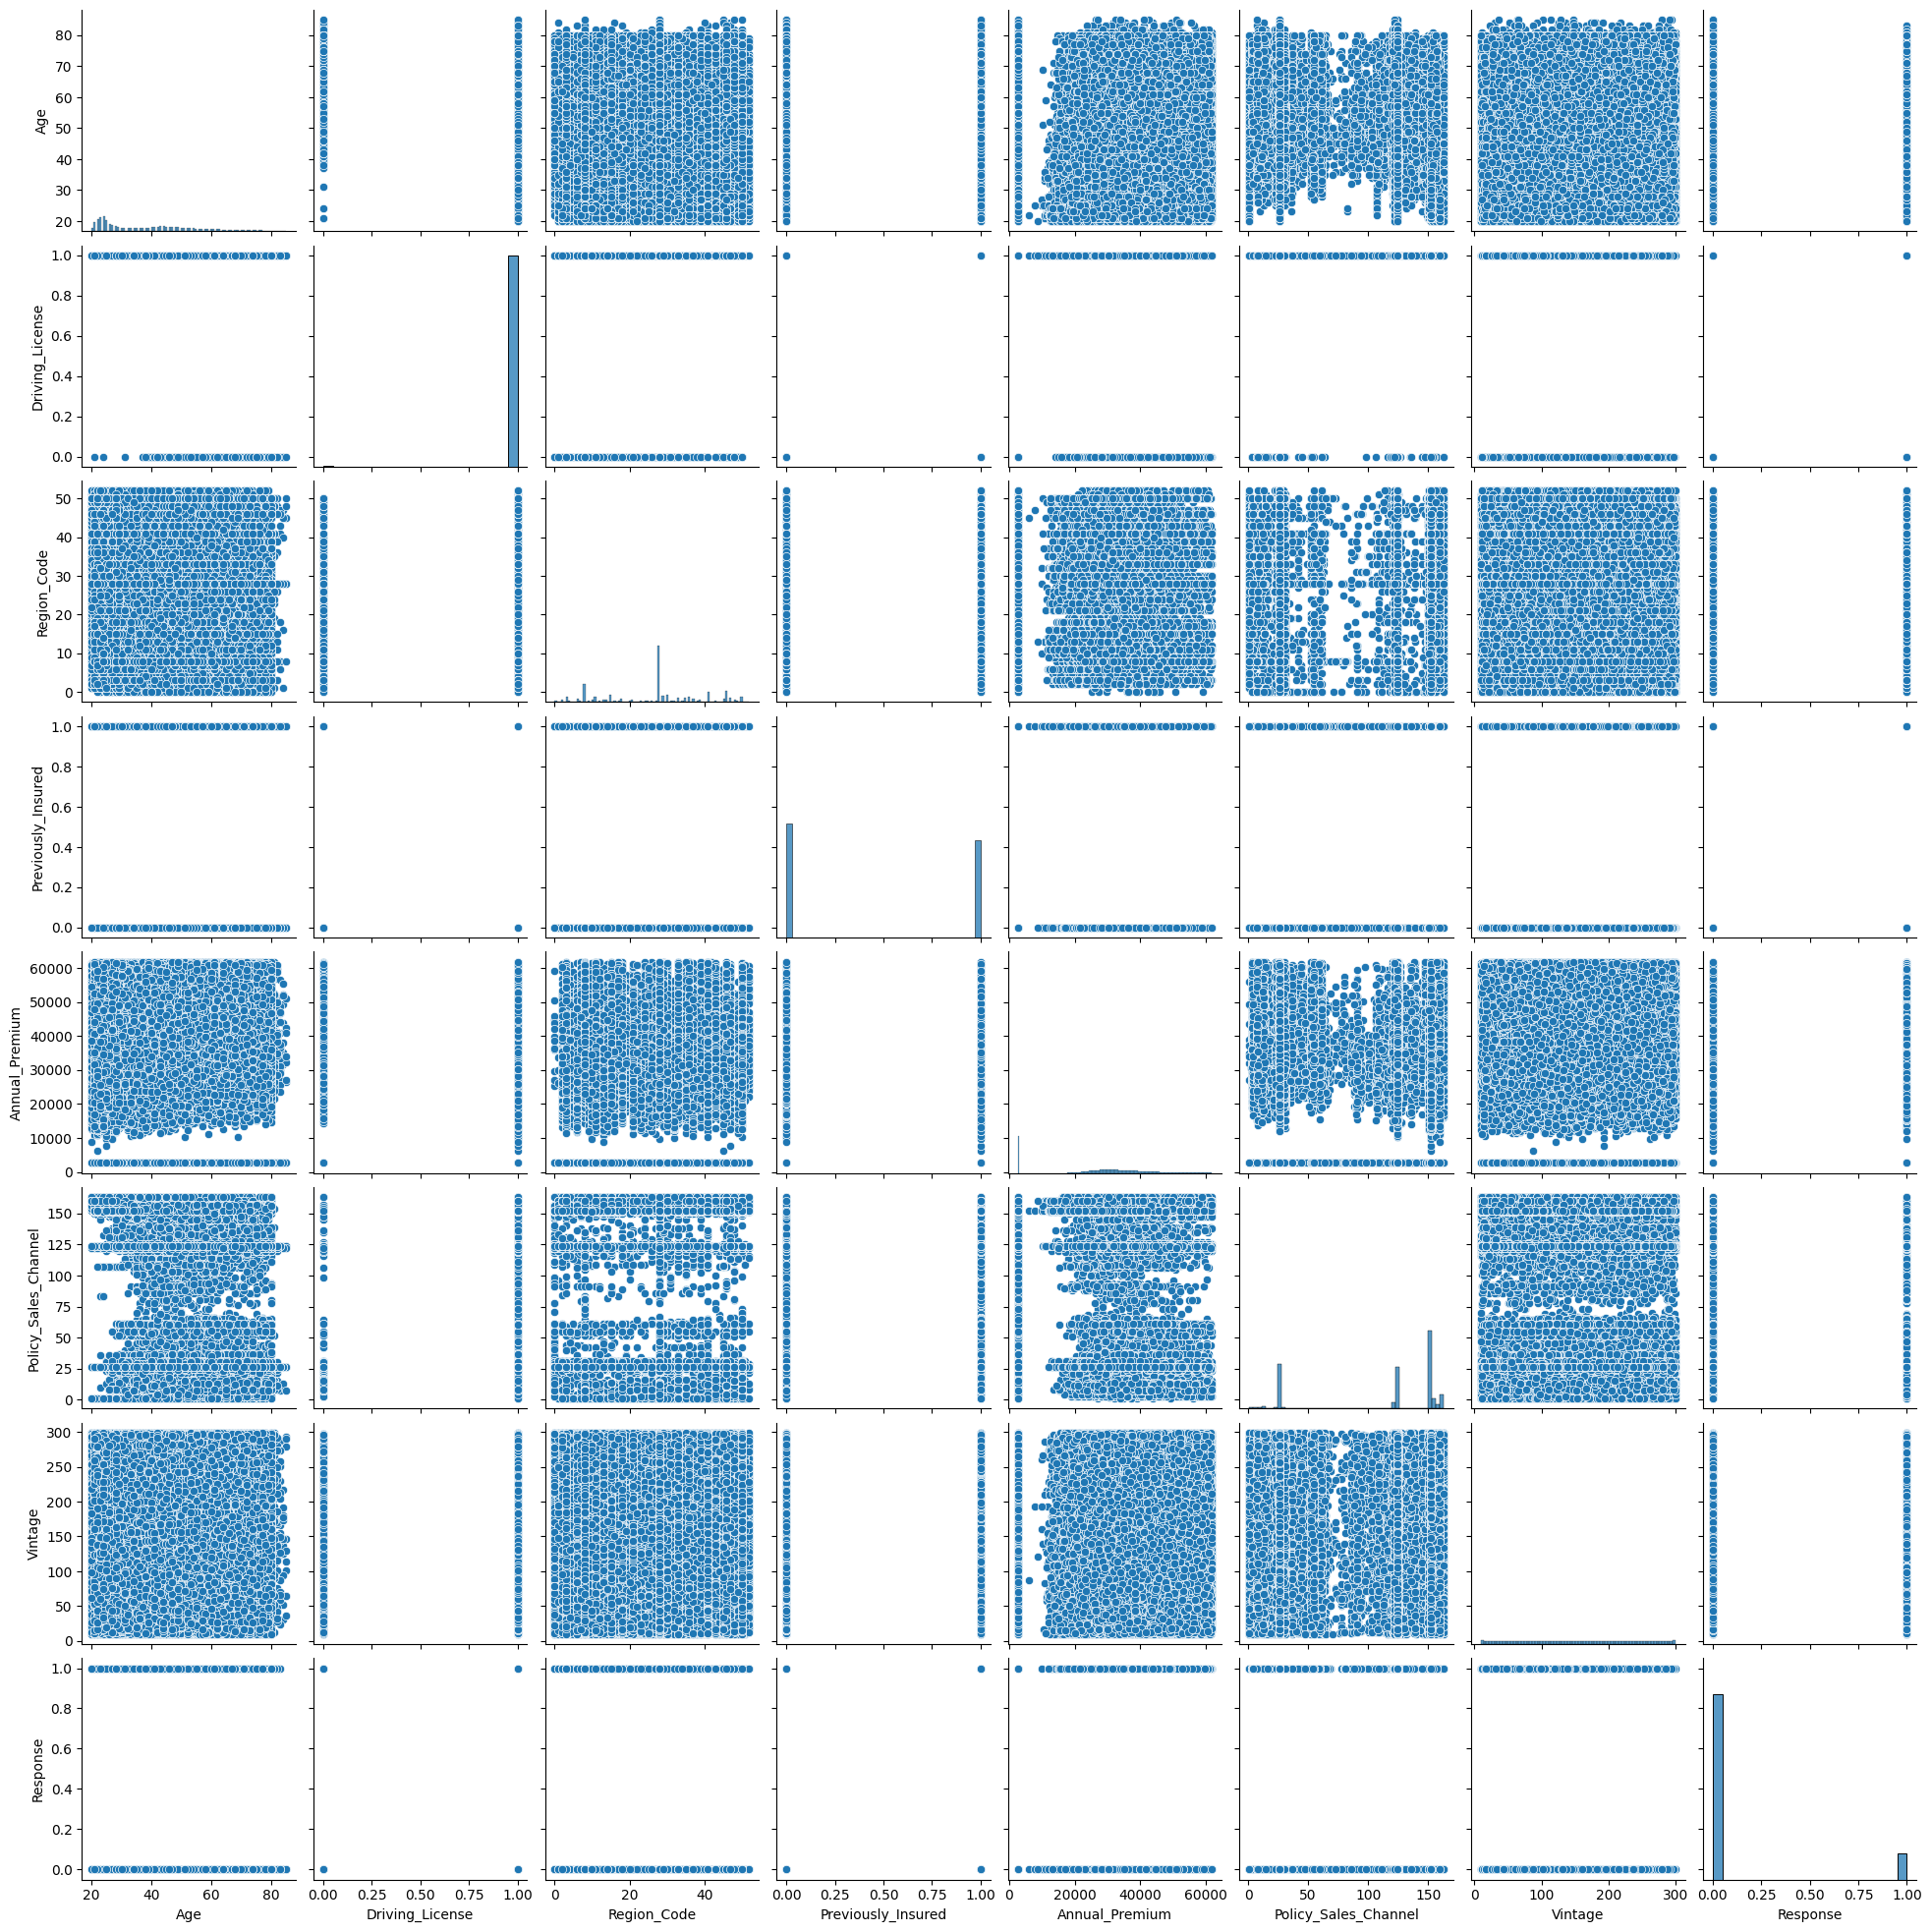

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

 Pair plots allow you to quickly identify relationships between pairs of variables. Each scatterplot in the matrix represents the relationship between two variables, with one variable on the x-axis and the other on the y-axis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
categorical_cols = [col for col in df.columns if df[col].dtype=='O']
categorical_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [ ]:
manual_labels = {
    'Gender': {'Male': 1, 'Female': 0},
    'Vehicle_Age': {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2},
    'Vehicle_Damage': {'Yes': 1, 'No': 0}
}

# Apply label encoding
for column in categorical_cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(manual_labels[column].keys()))
    df[column] = label_encoder.transform(df[column])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding is used to encode categorical variables into numerical format. Label encoding assigns a unique integer to each category in a categorical variable. This technique is appropriate when the categories have an ordinal relationship, such as in the case of "Vehicle_Age","Gender","Vehicle Damage" where these represent different categories. Label encoding simplifies the process of working with categorical data for machine learning algorithms by converting them into numerical form, making them suitable for model training.

### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X = df.drop(['Response'],axis=1)
y = df['Response']

[0.00592808 0.15799656 0.00047334 0.11180734 0.05723634 0.01724634
 0.07239907 0.22719756 0.07537414 0.27434125]


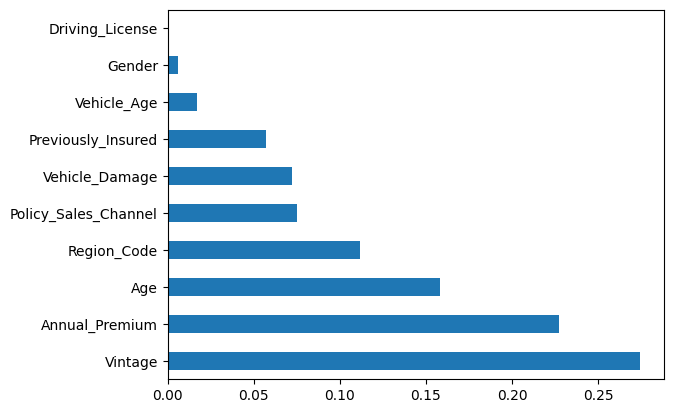

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [ ]:
df.drop(['Driving_License'],axis=1,inplace=True) # Dropping driving license as it has very low significance

##### What all feature selection methods have you used  and why?

The feature selection method used in the provided code is based on the feature importances computed by the Extra Trees Classifier algorithm. This method ranks the importance of each feature based on how much they contribute to the overall performance of the classifier. Features with higher importances are considered more relevant for predicting the target variable. The top features are then visualized using a horizontal bar plot to provide insights into which features have the most significant impact on the model's predictions.

##### Which all features you found important and why?

From the chart we can see , Except Driving License remaining features has a significant score which can be defined as a important feature , So we will remove columns which are not important

### 3.Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1,1))
df['Region_Code']=scaler.fit_transform(df['Region_Code'].values.reshape(-1,1))
df['Annual_Premium'] = scaler.fit_transform(df['Annual_Premium'].values.reshape(-1,1))
df['Policy_Sales_Channel'] = scaler.fit_transform(df['Policy_Sales_Channel'].values.reshape(-1,1))
df['Vintage'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

In [ ]:
df.head()

Gender       Age  Region_Code  Previously_Insured  Vehicle_Age  \
0       1  0.345182     0.117406                   0            2   
1       1  2.417701    -1.760828                   0            0   
2       1  0.539480     0.117406                   0            2   
3       1 -1.144442    -1.159793                   1            1   
4       0 -0.626312     1.094088                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  Response  
0               1        0.758959             -1.601474  0.748826         1  
1               0        0.289720             -1.601474  0.342470         0  
2               1        0.612449             -1.601474 -1.521990         1  
3               0       -0.043793              0.730152  0.581503         0  
4               0       -0.119965              0.730152 -1.378570         0

##### Which method have you used to scale you data and why?

The method used to scale the data is StandardScaler. This method was chosen because it standardizes the features by removing the mean and scaling to unit variance, which can help improve the performance of certain machine learning algorithms, particularly those sensitive to the scale of the input features.

### 4.Data Sampling

0    325634
1     45155
Name: Response, dtype: int64
 


<Axes: ylabel='Response'>

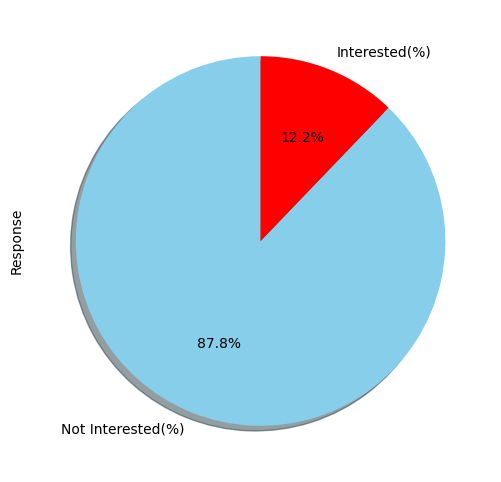

In [ ]:
print(df.Response.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Response'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Interested(%)','Interested(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 87:12. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
X = df.drop('Response',axis=1)
y = df['Response']

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


<Axes: xlabel='Response', ylabel='count'>

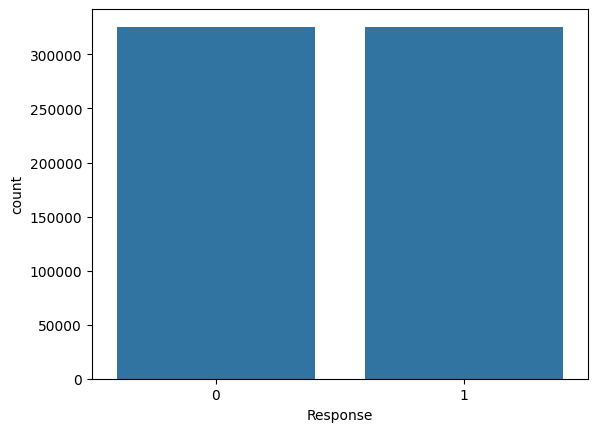

In [ ]:
from imblearn.over_sampling import RandomOverSampler
randomsample = RandomOverSampler()
x_new,y_new = randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(x=y_new)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The technique used to handle the imbalanced dataset is Random Over-sampling. Random Over-sampling involves randomly duplicating instances from the minority class to balance the class distribution. This method increases the number of minority class samples to match the majority class, thus alleviating the class imbalance issue. Random Over-sampling is chosen because it is a simple and effective way to address class imbalance without introducing bias or discarding data. It helps improve the model's ability to learn from the minority class by providing more representative samples for training.

### 5. Data Splitting

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=0)

##### What data splitting ratio have you used and why?

The above code splits the data into training and testing sets using an 80-20 ratio, where 80% of the data is used for training and 20% is used for testing. The test_size parameter is set to 0.2, indicating the proportion of the dataset allocated for testing. This ratio is commonly used to strike a balance between having enough data for training to learn patterns effectively and having enough data for testing to evaluate the model's performance accurately. Additionally, setting a random_state of 0 ensures reproducibility of the split.

## ***7. ML Model Implementation***

### ML Model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# Fit the Algorithm
clf.fit(X_train, y_train)
# Fit the Algorithm

# Predict on the model
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.7844837182878003
The accuracy on test dataset is 0.7842215978012191


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[154099 106232]
 [  6055 254628]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

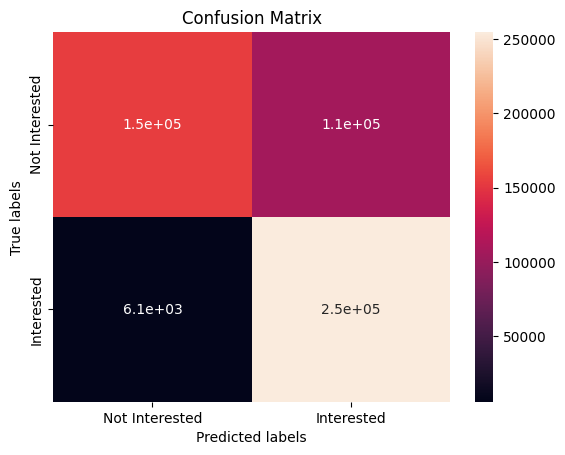

In [ ]:
# Visualizing evaluation Metric Score chart
labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[38755 26548]
 [ 1558 63393]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

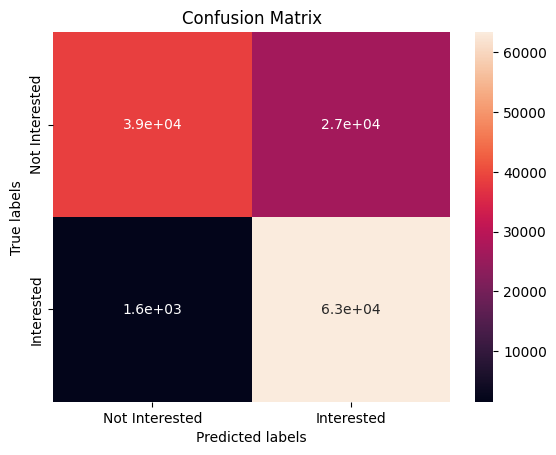

In [ ]:
labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73    160154
           1       0.98      0.71      0.82    360860

    accuracy                           0.78    521014
   macro avg       0.78      0.83      0.78    521014
weighted avg       0.86      0.78      0.79    521014

 
roc_auc_score
0.7843537190357264


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     40313
           1       0.98      0.70      0.82     89941

    accuracy                           0.78    130254
   macro avg       0.78      0.83      0.78    130254
weighted avg       0.86      0.78      0.79    130254

 
roc_auc_score
0.7847384994995892


I used Logistic regression algorithm to create the model. As I got not so good result.

For training dataset, i found precision of 59% and recall of 96% and f1-score of 73% for not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 97% and recall of 70% and f1-score of 82%. Accuracy is 78% and average percision, recall & f1_score are 78%, 83% and 77% respectively with a roc auc score of 78%.

For testing dataset, i found precision of 60% and recall of 96% and f1-score of 73% for not Interested customer data. But, I am also interested to see the result for Interested cutomer result as I got precision of 97% and recall of 71% and f1-score of 82%. Accuracy is 79% and average percision, recall & f1_score are 78%, 83% and 78% respectively with a roc auc score of 78%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV)
model = LogisticRegression()
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Predict on the model
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.819343 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73    160154
           1       0.98      0.71      0.82    360860

    accuracy                           0.78    521014
   macro avg       0.78      0.83      0.78    521014
weighted avg       0.86      0.78      0.79    521014

 
roc_auc_score
0.7843537190357264


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     40313
           1       0.98      0.70      0.82     89941

    accuracy                           0.78    130254
   macro avg       0.78      0.83      0.78    130254
weighted avg       0.86      0.78      0.79    130254

 
roc_auc_score
0.7847384994995892


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 59% and recall of 96% and f1-score of 73% for not interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 98% and recall of 70% and f1-score of 82%. Accuracy is 78% and average percision, recall & f1_score are 78%, 83% and 78% respectively with a roc auc score of 78%.

No improvement or decreament every score is constant as earlier for training dataset.

For testing dataset, i found precision of 59% and recall of 96% and f1-score of 73% for not interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 98% and recall of 71% and f1-score of 82%. Accuracy is 78% and average percision, recall & f1_score are 79%, 83% and 78% respectively with a roc auc score of 78%.

No improvement or decreament every score is constant as earlier for testing dataset.

### ML Model - RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9999078719573754
The accuracy on test dataset is 0.9503047891043653


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[260283     48]
 [     0 260683]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

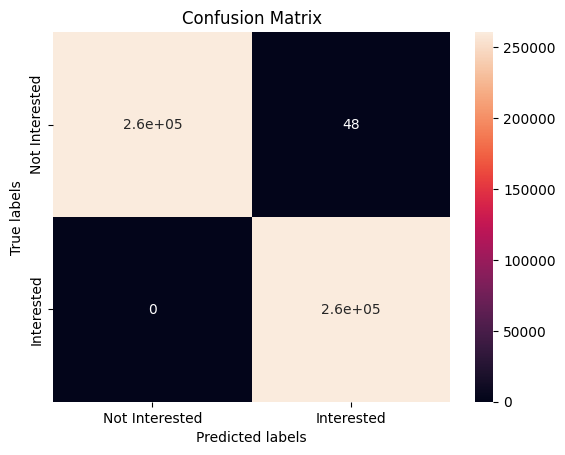

In [ ]:
# Visualizing evaluation Metric Score chart
labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[58954  6349]
 [  124 64827]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

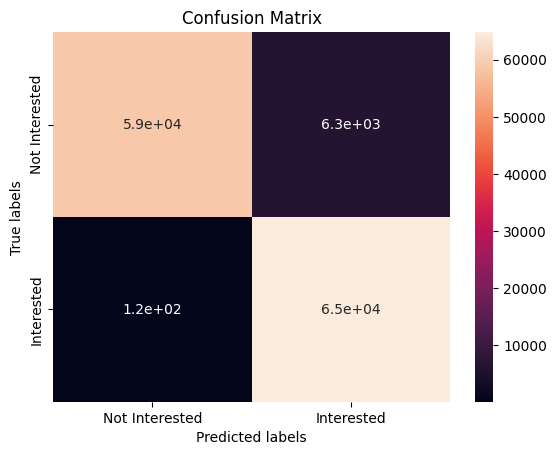

In [ ]:

labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    260283
           1       1.00      1.00      1.00    260731

    accuracy                           1.00    521014
   macro avg       1.00      1.00      1.00    521014
weighted avg       1.00      1.00      1.00    521014

 
roc_auc_score
0.9999078096730701


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     59078
           1       1.00      0.91      0.95     71176

    accuracy                           0.95    130254
   macro avg       0.95      0.95      0.95    130254
weighted avg       0.95      0.95      0.95    130254

 
roc_auc_score
0.9504335787460936


Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for not interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 90% and recall of 100% and f1-score of 95% for not interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 100% and recall of 91% and f1-score of 95%. Accuracy is 95% and average percision, recall & f1_score are 95%, 96% and 95% respectively with a roc auc score of 95%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (GridSearch CV)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   9.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   9.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   9.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   9.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  14.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  14.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  14.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  14.7s
[CV] END max_depth=4, min_sam

In [ ]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.822076 using {'max_depth': 8, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 50}


[[147890  79929]
 [ 12949 215119]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

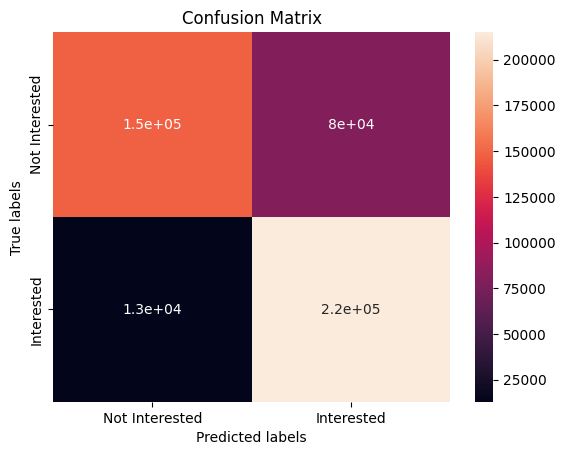

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[63862 33953]
 [ 5545 92021]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

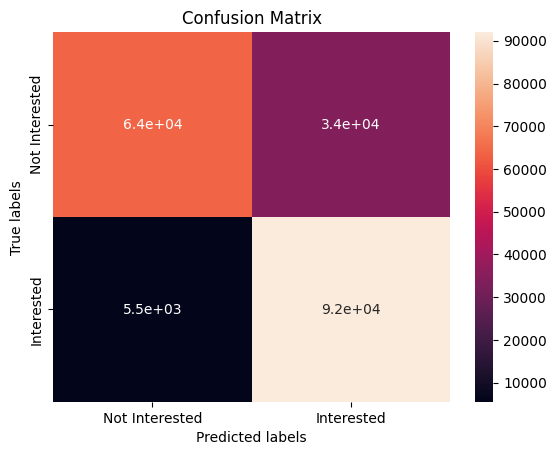

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76    160839
           1       0.94      0.73      0.82    295048

    accuracy                           0.80    455887
   macro avg       0.80      0.82      0.79    455887
weighted avg       0.84      0.80      0.80    455887

 
roc_auc_score
0.7961893816025416


In [ ]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76     69407
           1       0.94      0.73      0.82    125974

    accuracy                           0.80    195381
   macro avg       0.80      0.83      0.79    195381
weighted avg       0.84      0.80      0.80    195381

 
roc_auc_score
0.7980261130836381


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 64% and recall of 92% and f1-score of 75% for not interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 94% and recall of 72% and f1-score of 82%. Accuracy is 79% and average percision, recall & f1_score are 80%, 82% and 79% respectively with a roc auc score of 79%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 64% and recall of 92% and f1-score of 76% for not Interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 94% and recall of 73% and f1-score of 82%. Accuracy is 79% and average percision, recall & f1_score are 80%, 83% and 80% respectively with a roc auc score of 79%.

Quite improvemnt seen in recall but rest scores have decreased.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.819772597281455
The accuracy on test dataset is 0.8151381147603912


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[181266  79065]
 [ 14836 245847]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

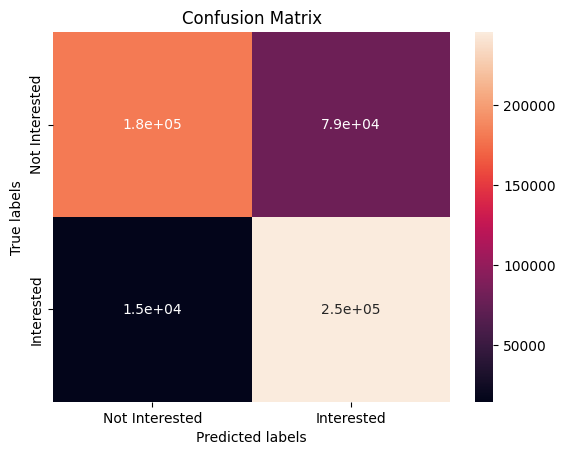

In [ ]:
# Visualizing evaluation Metric Score chart
labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[45164 20139]
 [ 3940 61011]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

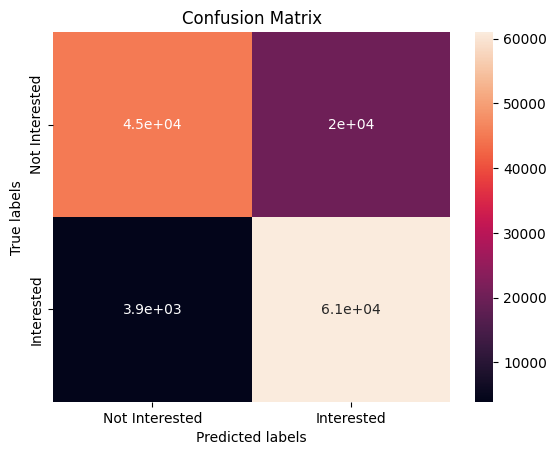

In [ ]:
labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79    196102
           1       0.94      0.76      0.84    324912

    accuracy                           0.82    521014
   macro avg       0.82      0.84      0.82    521014
weighted avg       0.85      0.82      0.82    521014

 
roc_auc_score
0.8196892283982566


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79     49104
           1       0.94      0.75      0.84     81150

    accuracy                           0.82    130254
   macro avg       0.82      0.84      0.81    130254
weighted avg       0.85      0.82      0.82    130254

 
roc_auc_score
0.8154728518441383


Then, I used XGBoost algorithm to create the model. As I got there good result.

For training dataset, i found precision of 70% and recall of 92% and f1-score of 79% for not Interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 94% and recall of 76% and f1-score of 84%. Accuracy is 82% and average percision, recall & f1_score are 82%, 84% and 82% respectively with a roc auc score of 82%.

For testing dataset, i found precision of 69% and recall of 92% and f1-score of 79% for not Interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 94% and recall of 75% and f1-score of 84%. Accuracy is 82% and average percision, recall & f1_score are 82%, 84% and 81% respectively with a roc auc score of 82%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)

# Making predictions on train and test data
train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total tim

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.887352 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


[[188485  71846]
 [  9396 251287]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

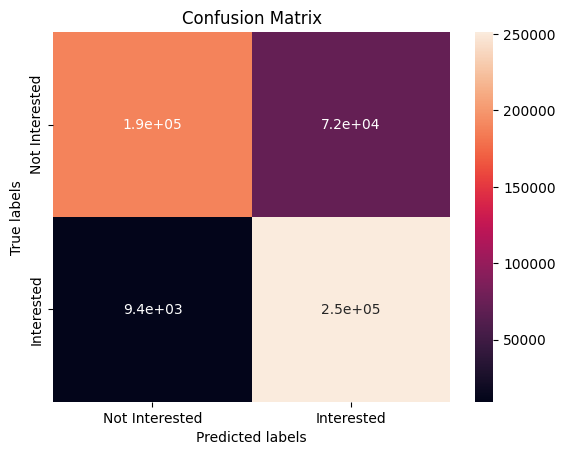

In [ ]:
labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[46472 18831]
 [ 2836 62115]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

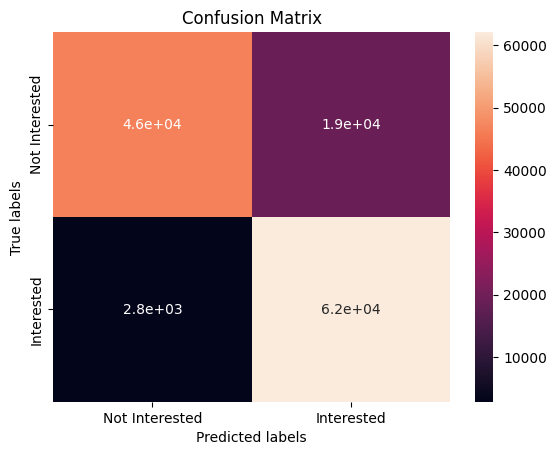

In [ ]:
labels = ['Not Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82    197881
           1       0.96      0.78      0.86    323133

    accuracy                           0.84    521014
   macro avg       0.84      0.87      0.84    521014
weighted avg       0.87      0.84      0.85    521014

 
roc_auc_score
0.8439883982499442


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81     49308
           1       0.96      0.77      0.85     80946

    accuracy                           0.83    130254
   macro avg       0.83      0.85      0.83    130254
weighted avg       0.86      0.83      0.84    130254

 
roc_auc_score
0.8339864200948199


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 73% and recall of 95% and f1-score of 82% for not Interested customer data. BUt, I am also interested to see the result for Interested cutomer result as I got precision of 96% and recall of 77% and f1-score of 85%. Accuracy is 84% and average percision, recall & f1_score are 84%, 86% and 84% respectively with a roc auc score of 84%.

Good Improvement in all the scores by 2% to 3%

For testing dataset, i found precision of 71% and recall of 94% and f1-score of 81% for not Interested customer data. BUt, I am also interested to see the result for interested cutomer result as I got precision of 95% and recall of 77% and f1-score of 85%. Accuracy is 84% and average percision, recall & f1_score are 84%, 86% and 83% respectively with a roc auc score of 83%.

Quite improvemnt in all scores by 1% to 2%

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, the evaluation metrics that would be most relevant are Recall for the "Interested" customer data, Precision for the "Not Interested" customer data, F1-Score for a balanced view of model performance, and ROC AUC Score for distinguishing between the two classes effectively. These metrics help ensure that the model is effective in identifying Interested customers (where recall is high) and minimizing false positives (where precision is high), while also providing a comprehensive view of the model's performance across different metrics.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. first of all I need accuracy for the insurance cross sell prediction and time isn't a constrain here, beacuse the data is not lke swiggy or ola which booking needs to be faster. Thus, for greater accuracy we used kernel SVM, Random Forest, XgBoost kind of ensemble techniques. So, I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
import shap

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)

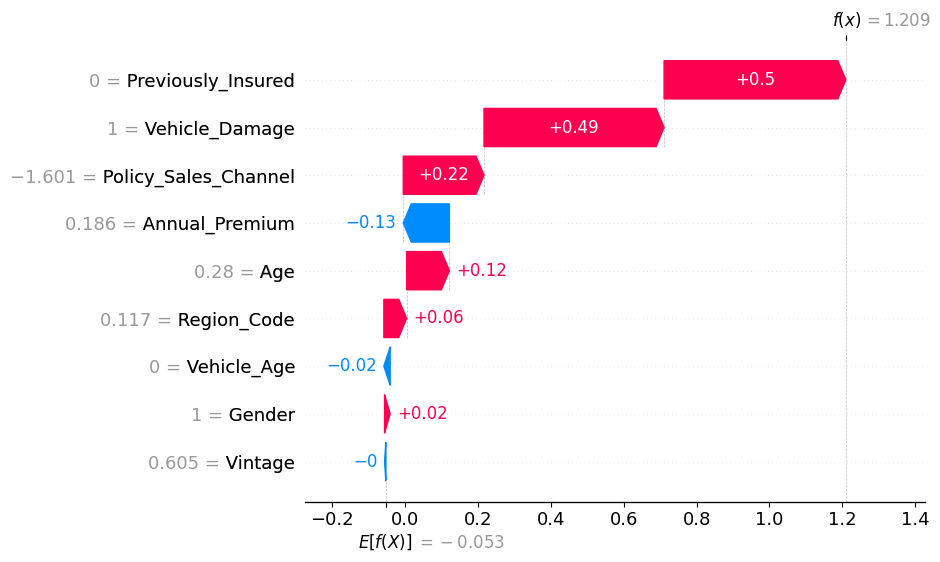

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In the SHAP waterfall plot for your health insurance cross-sell project, the model predicts a high probability f(x) = (1.209) of successfully cross-selling to this particular customer, compared to the average prediction across all customers (-0.2). Previously purchased insurance (+0.5), vehicle damage (+0.49), and coming through a specific sales channel (+0.22) significantly increased the predicted probability. Other factors like lower annual premiums (-0.13), older vehicle age (-0.02), and being male (+0.02) had a minor negative influence.

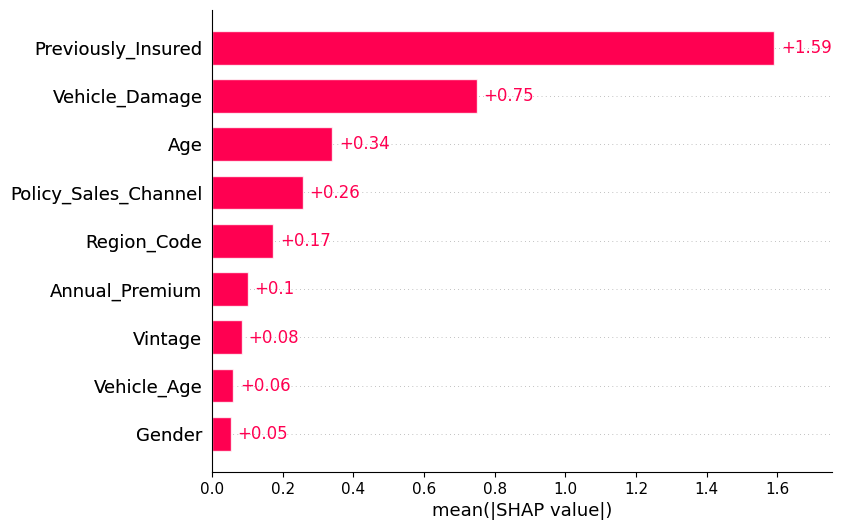

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

This SHAP summary plot analyzes a machine learning model designed to predict customer interest in insurance. The most influential factor is "Previously_Insured", indicating customers with prior insurance are far more likely to be interested. Other significant factors increasing the likelihood of interest include "Vehicle_Damage" , "Age" , along with "Policy_Sales_Channel" and "Region_Code".These insights can help insurance companies refine their marketing and sales strategies.

# **Conclusion**

1.Most customers don't want to buy insurance for their vehicles.

2.More men are interested in buying insurance compared to women.

3.People aged 30-50 are the most interested in getting vehicle insurance.

4.Customers with vehicles that have a 1-2 year age guarantee are the most interested.

5.Having a driving license makes customers more likely to want vehicle insurance.

6.Things like how old the vehicle is, how much the yearly payment is, and the age of the customer affect whether they want insurance.

7.When we compared different ways of predicting who will want insurance, we found that **XGBoostClassifier** Algorithm worked the best.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***